In [1]:
!pip install missingno

In [2]:
!pip install rdkit

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from plotly import graph_objects as go
import datetime as dt
import plotly.express as px
from rdkit import Chem
from rdkit.Chem import Descriptors
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
df = pd.read_csv(r'C:\Users\Vlad\Downloads\full_data_not_prepare.csv')

In [5]:
pd.set_option('display.max_colwidth', None)

## Первый взгляд на данные и предобработка

In [6]:
df.shape

(171314, 22)

In [7]:
df.head()

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),...,Eye_Irritation,Eye_Irritation (a.u.),Mutagenicity,Mutagenicity (a.u.),Respiratory_Toxicity,Respiratory_Toxicity (a.u.),LC50,LC50 (a.u.),NOAEL,NOAEL (a.u)
0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,Mus musculus,Intraperitoneal,300.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
1,ChEMBL,Br.Br.Cc1cc(-c2cccc(O)c2)nnc1NCCN1CCOCC1,Mus musculus,Intraperitoneal,200.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
2,ChEMBL,Br.Br.Cc1cc(-c2ccccc2O)nnc1NCCN1CCOCC1,Mus musculus,Intraperitoneal,200.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
3,ChEMBL,Br.CC(=O)c1ccc(NC(=O)CCN2CCN(c3ccc(Br)cn3)CC2)cc1,ADMET,Oral,3585.75,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
4,ChEMBL,Br.CC(C)C(N)C(=O)NNc1nncc(-c2ccc(Cl)cc2)n1.O,Mus musculus,Intraperitoneal,178.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171314 entries, 0 to 171313
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source                       171314 non-null  object 
 1   Smiles                       171314 non-null  object 
 2   Exp. Animal                  159502 non-null  object 
 3   Method of administration     157765 non-null  object 
 4   LD50                         150433 non-null  object 
 5   LD50 (a.u.)                  171314 non-null  object 
 6   Carcinogenicity              1150 non-null    float64
 7   Carcinogenicity (a.u.)       0 non-null       float64
 8   Hepatoxicity                 3366 non-null    float64
 9   Hepatoxicity (a.u.)          0 non-null       float64
 10  Eye_Corrosion                2693 non-null    float64
 11  Eye_Corrosion (a.u.)         0 non-null       float64
 12  Eye_Irritation               5672 non-null    float64
 13 

In [9]:
df.describe()

,Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),Eye_Corrosion,Eye_Corrosion (a.u.),Eye_Irritation,Eye_Irritation (a.u.),Mutagenicity,Mutagenicity (a.u.),Respiratory_Toxicity,Respiratory_Toxicity (a.u.),LC50,NOAEL
count,1150.000000,0.0,3366.000000,0.0,2693.000000,0.0,5672.000000,0.0,7911.000000,0.0,1462.000000,0.0,6.939000e+03,3029.000000
mean,0.489565,NaN,0.511586,NaN,0.346825,NaN,0.705219,NaN,0.547086,NaN,0.608755,NaN,1.627702e+06,733.344282
std,0.500109,NaN,0.499940,NaN,0.476048,NaN,0.455985,NaN,0.497809,NaN,0.488196,NaN,1.350530e+08,1780.935655
min,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.250000e-06,0.006000
25%,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,5.500000e-01,65.000000
50%,0.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,6.900000e+00,300.000000
75%,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,2.187635e+02,1000.000000
max,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.125000e+10,35466.666667


In [10]:
df.dtypes

Source                          object
Smiles                          object
Exp. Animal                     object
Method of administration        object
LD50                            object
LD50 (a.u.)                     object
Carcinogenicity                float64
Carcinogenicity (a.u.)         float64
Hepatoxicity                   float64
Hepatoxicity (a.u.)            float64
Eye_Corrosion                  float64
Eye_Corrosion (a.u.)           float64
Eye_Irritation                 float64
Eye_Irritation (a.u.)          float64
Mutagenicity                   float64
Mutagenicity (a.u.)            float64
Respiratory_Toxicity           float64
Respiratory_Toxicity (a.u.)    float64
LC50                           float64
LC50 (a.u.)                     object
NOAEL                          float64
NOAEL (a.u)                     object
dtype: object

In [11]:
df['LD50'] = pd.to_numeric(df['LD50'].str.replace(',', '.'))

In [12]:
df['LD50'] = df['LD50'].astype('float')

In [13]:
df.dtypes

Source                          object
Smiles                          object
Exp. Animal                     object
Method of administration        object
LD50                           float64
LD50 (a.u.)                     object
Carcinogenicity                float64
Carcinogenicity (a.u.)         float64
Hepatoxicity                   float64
Hepatoxicity (a.u.)            float64
Eye_Corrosion                  float64
Eye_Corrosion (a.u.)           float64
Eye_Irritation                 float64
Eye_Irritation (a.u.)          float64
Mutagenicity                   float64
Mutagenicity (a.u.)            float64
Respiratory_Toxicity           float64
Respiratory_Toxicity (a.u.)    float64
LC50                           float64
LC50 (a.u.)                     object
NOAEL                          float64
NOAEL (a.u)                     object
dtype: object

In [14]:
df.duplicated().sum()

2920

In [15]:
df = df.drop_duplicates()

In [16]:
df.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
Source,0.00%
Smiles,0.00%
LD50 (a.u.),0.00%
LC50 (a.u.),0.00%
Exp. Animal,6.99%
Method of administration,7.98%
LD50,63.67%
Mutagenicity,95.35%
LC50,96.07%
Eye_Irritation,96.69%


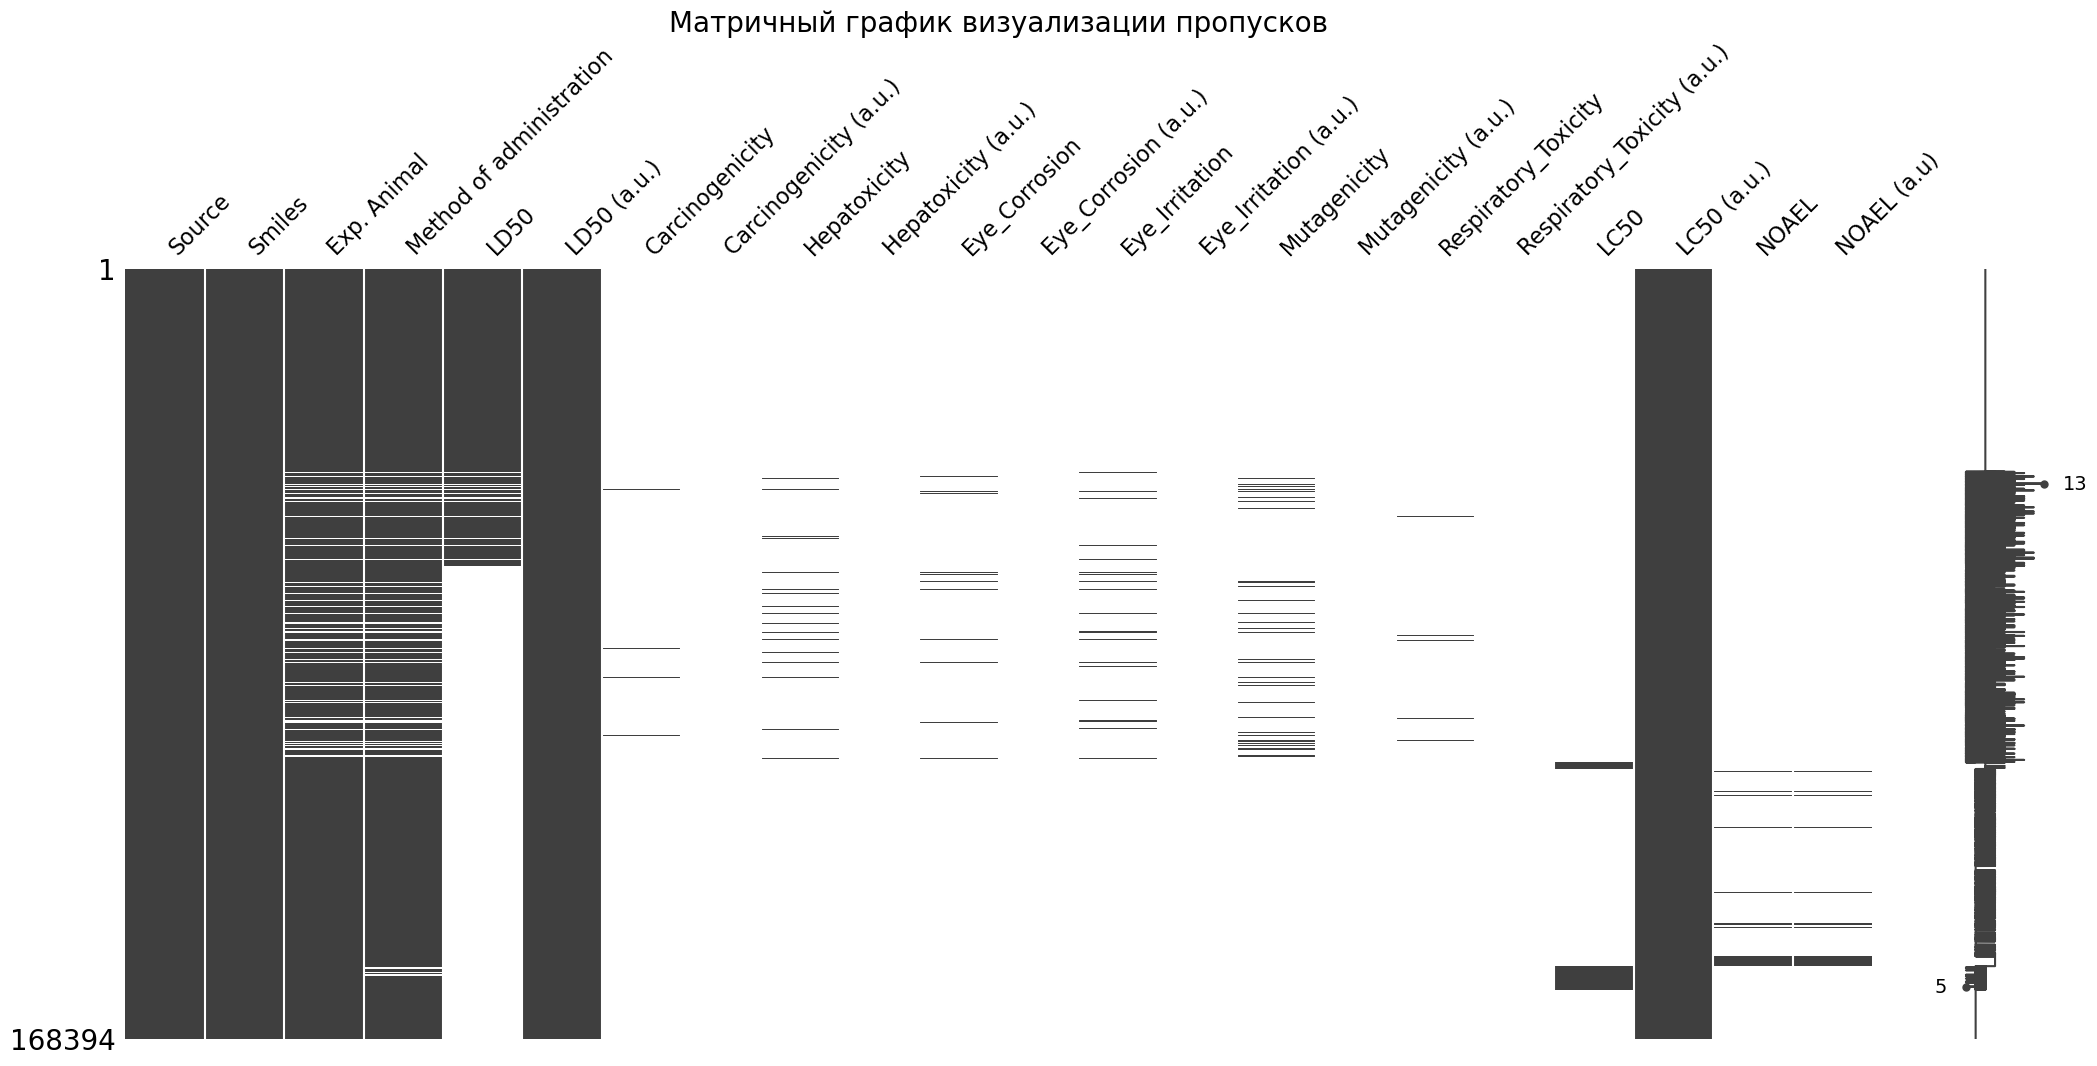

In [17]:
msno.matrix(df)
plt.title('Матричный график визуализации пропусков', fontsize = 20)
plt.show()

Матричный график, который использовался в рамках библиотеки missingno является отличным инструментом для визуализации пропусков. Суть данного метода заключается в обеспечении цветной заливки для каждого столбца. Таким образом, когда данные присутствуют, график затеняется серым (или выбранным вами цветом), а когда они отсутствуют, график отображается белым цветом. Данный способ удобен тем, что можно визуально определить как сами пропуски, так и их долю от всех данных.

In [18]:
df['Exp. Animal'].value_counts()
#для удобства можно привести значения к нижнему регистру

Mouse                                              97807
Rat                                                29723
Rabbit                                              6803
rat                                                 6437
mouse                                               3780
Mus musculus                                        3174
Guinea Pig                                          2282
rabbit                                              1094
rats                                                 461
Rattus norvegicus                                    366
fathead minnow                                       364
trout                                                361
mice                                                 349
water flea                                           336
ADMET                                                326
guinea pig                                           293
mallard duck                                         286
bluegill                       

In [19]:
df['Exp. Animal'] = df['Exp. Animal'].str.lower()

In [20]:
df['Exp. Animal'] = df['Exp. Animal'].replace({'mus musculus': 'mouse', 'rats' : 'rat',
                                              'Rattus norvegicus': 'rat', 'mice':'mouse'})

In [21]:
df.head()

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),...,Eye_Irritation,Eye_Irritation (a.u.),Mutagenicity,Mutagenicity (a.u.),Respiratory_Toxicity,Respiratory_Toxicity (a.u.),LC50,LC50 (a.u.),NOAEL,NOAEL (a.u)
0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,300.00,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
1,ChEMBL,Br.Br.Cc1cc(-c2cccc(O)c2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,200.00,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
2,ChEMBL,Br.Br.Cc1cc(-c2ccccc2O)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,200.00,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
3,ChEMBL,Br.CC(=O)c1ccc(NC(=O)CCN2CCN(c3ccc(Br)cn3)CC2)cc1,admet,Oral,3585.75,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
4,ChEMBL,Br.CC(C)C(N)C(=O)NNc1nncc(-c2ccc(Cl)cc2)n1.O,mouse,Intraperitoneal,178.00,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN


In [22]:
df['LD50 (a.u.)'].unique(), df['LC50 (a.u.)'].unique(), df['NOAEL (a.u)'].unique(), df['Carcinogenicity (a.u.)'].unique()

(array(['mg/kg'], dtype=object),
 array(['mg/L'], dtype=object),
 array([nan, 'mg.L', 'mg.kg-1'], dtype=object),
 array([nan]))

In [23]:
df['LC50 (a.u.)'] = df['LC50 (a.u.)'].replace('mg/L', 'mg.L')
df['LD50 (a.u.)'] = df['LD50 (a.u.)'].replace('mg/kg', 'mg.kg-1')
#привели единицы измерения в размерностях метрики LC50 и LD50 к одному формату

In [24]:
df['Hepatoxicity (a.u.)'].unique(), df['Eye_Corrosion (a.u.)'].unique(), df['Eye_Irritation (a.u.)'].unique(), df['Carcinogenicity (a.u.)'].unique()

(array([nan]), array([nan]), array([nan]), array([nan]))

Обратим внимание, что по данным метрикам токсичности отсутствуют данные по единицам измерения, поэтому решил избавиться от них.

In [25]:
df = df[['Source', 'Smiles','Exp. Animal','Method of administration','LD50', 'LD50 (a.u.)', 'LC50', 'LC50 (a.u.)', 'NOAEL', 'NOAEL (a.u)']]

## EDA

In [26]:
df['Source'].unique()

array(['ChEMBL', 'CompTox', 'TOXRIC', 'toxval', 'PubChem'], dtype=object)

In [27]:
df.shape

(168394, 10)

In [28]:
df.head()

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),LC50,LC50 (a.u.),NOAEL,NOAEL (a.u)
0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,300.00,mg.kg-1,NaN,mg.L,NaN,NaN
1,ChEMBL,Br.Br.Cc1cc(-c2cccc(O)c2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,200.00,mg.kg-1,NaN,mg.L,NaN,NaN
2,ChEMBL,Br.Br.Cc1cc(-c2ccccc2O)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,200.00,mg.kg-1,NaN,mg.L,NaN,NaN
3,ChEMBL,Br.CC(=O)c1ccc(NC(=O)CCN2CCN(c3ccc(Br)cn3)CC2)cc1,admet,Oral,3585.75,mg.kg-1,NaN,mg.L,NaN,NaN
4,ChEMBL,Br.CC(C)C(N)C(=O)NNc1nncc(-c2ccc(Cl)cc2)n1.O,mouse,Intraperitoneal,178.00,mg.kg-1,NaN,mg.L,NaN,NaN


In [29]:
df.groupby('Method of administration').agg({'LD50':'count', 'LC50':'count', 'NOAEL':'count'})

,LD50,LC50,NOAEL
Method of administration,,,
Intramusculary,159,0,0
Intraperitoneal,13436,0,0
Intravenous,6236,0,0
Oral,904,0,0
artificial soil,0,16,0
dermal,3685,1,64
diet,0,482,0
exposure in an artificial soil,0,14,0
flow-through,0,228,0


In [30]:
smiles_list = list(set(df['Smiles']))

In [31]:
def smiles_list_to_specific_descriptor(smiles_list, descriptor_name):
    results = {}
    
    for smiles in smiles_list:
        # Преобразование SMILES в молекулу
        mol = Chem.MolFromSmiles(smiles)
        
        if mol is None:
            results[smiles] = "Неверный SMILES"
            continue
        
        # Поиск и вычисление конкретного дескриптора
        descriptor_value = None
        try:
            for name, function in Descriptors.descList:
                if name == descriptor_name:
                    descriptor_value = function(mol)
                    break
            if descriptor_value is None:
                results[smiles] = "Указанный дескриптор не найден"
            else:
                results[smiles] = descriptor_value
        except Exception as e:
            results[smiles] = f"Ошибка при вычислении дескриптора: {e}"

    return results

In [33]:
def main():
    global results
    descriptor_name = "MolWt" 
   
    results = smiles_list_to_specific_descriptor(smiles_list, descriptor_name)
    

    return results
if __name__ == "__main__":
    main()

[17:01:34] SMILES Parse Error: syntax error while parsing: <urlopen
[17:01:34] SMILES Parse Error: Failed parsing SMILES '<urlopen' for input: '<urlopen'
[17:01:34] Explicit valence for atom # 1 Cl, 5, is greater than permitted
[17:01:35] Explicit valence for atom # 1 Si, 8, is greater than permitted
[17:01:37] Explicit valence for atom # 1 Si, 8, is greater than permitted
[17:01:38] WARNING: not removing hydrogen atom without neighbors
[17:01:38] WARNING: not removing hydrogen atom without neighbors
[17:01:38] WARNING: not removing hydrogen atom without neighbors
[17:01:38] WARNING: not removing hydrogen atom without neighbors
[17:01:38] WARNING: not removing hydrogen atom without neighbors
[17:01:38] WARNING: not removing hydrogen atom without neighbors
[17:01:38] WARNING: not removing hydrogen atom without neighbors
[17:01:38] WARNING: not removing hydrogen atom without neighbors
[17:01:39] WARNING: not removing hydrogen atom without neighbors
[17:01:39] WARNING: not removing hydrog

In [34]:
mol_weight = pd.DataFrame(list(results.items()), columns = ['Smiles', 'Mol_weight'])

In [35]:
df = pd.merge(df, mol_weight, on = 'Smiles')

In [36]:
df.head()

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),LC50,LC50 (a.u.),NOAEL,NOAEL (a.u),Mol_weight
0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,300.00,mg.kg-1,NaN,mg.L,NaN,NaN,476.213
1,ChEMBL,Br.Br.Cc1cc(-c2cccc(O)c2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,200.00,mg.kg-1,NaN,mg.L,NaN,NaN,476.213
2,ChEMBL,Br.Br.Cc1cc(-c2ccccc2O)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,200.00,mg.kg-1,NaN,mg.L,NaN,NaN,476.213
3,ChEMBL,Br.CC(=O)c1ccc(NC(=O)CCN2CCN(c3ccc(Br)cn3)CC2)cc1,admet,Oral,3585.75,mg.kg-1,NaN,mg.L,NaN,NaN,512.246
4,ChEMBL,Br.CC(C)C(N)C(=O)NNc1nncc(-c2ccc(Cl)cc2)n1.O,mouse,Intraperitoneal,178.00,mg.kg-1,NaN,mg.L,NaN,NaN,419.711


In [37]:
def main():
    global results
    descriptor_name = "NumValenceElectrons" 
   
    results = smiles_list_to_specific_descriptor(smiles_list, descriptor_name)
    

    return results
if __name__ == "__main__":
    main()

[17:02:16] SMILES Parse Error: syntax error while parsing: <urlopen
[17:02:16] SMILES Parse Error: Failed parsing SMILES '<urlopen' for input: '<urlopen'
[17:02:17] Explicit valence for atom # 1 Cl, 5, is greater than permitted
[17:02:18] Explicit valence for atom # 1 Si, 8, is greater than permitted
[17:02:21] Explicit valence for atom # 1 Si, 8, is greater than permitted
[17:02:23] WARNING: not removing hydrogen atom without neighbors
[17:02:23] WARNING: not removing hydrogen atom without neighbors
[17:02:23] WARNING: not removing hydrogen atom without neighbors
[17:02:23] WARNING: not removing hydrogen atom without neighbors
[17:02:23] WARNING: not removing hydrogen atom without neighbors
[17:02:23] WARNING: not removing hydrogen atom without neighbors
[17:02:24] WARNING: not removing hydrogen atom without neighbors
[17:02:24] WARNING: not removing hydrogen atom without neighbors
[17:02:25] WARNING: not removing hydrogen atom without neighbors
[17:02:25] WARNING: not removing hydrog

In [38]:
valence_electrons = pd.DataFrame(list(results.items()), columns = ['Smiles', 'Num_val_electrons'])

In [39]:
df = pd.merge(df, valence_electrons, on = 'Smiles')

In [40]:
df.head()

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),LC50,LC50 (a.u.),NOAEL,NOAEL (a.u),Mol_weight,Num_val_electrons
0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,300.00,mg.kg-1,NaN,mg.L,NaN,NaN,476.213,138
1,ChEMBL,Br.Br.Cc1cc(-c2cccc(O)c2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,200.00,mg.kg-1,NaN,mg.L,NaN,NaN,476.213,138
2,ChEMBL,Br.Br.Cc1cc(-c2ccccc2O)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,200.00,mg.kg-1,NaN,mg.L,NaN,NaN,476.213,138
3,ChEMBL,Br.CC(=O)c1ccc(NC(=O)CCN2CCN(c3ccc(Br)cn3)CC2)cc1,admet,Oral,3585.75,mg.kg-1,NaN,mg.L,NaN,NaN,512.246,150
4,ChEMBL,Br.CC(C)C(N)C(=O)NNc1nncc(-c2ccc(Cl)cc2)n1.O,mouse,Intraperitoneal,178.00,mg.kg-1,NaN,mg.L,NaN,NaN,419.711,132


In [41]:
def main():
    global results
    descriptor_name = "qed" 
   
    results = smiles_list_to_specific_descriptor(smiles_list, descriptor_name)
    

    return results
if __name__ == "__main__":
    main()

[17:02:51] SMILES Parse Error: syntax error while parsing: <urlopen
[17:02:51] SMILES Parse Error: Failed parsing SMILES '<urlopen' for input: '<urlopen'
[17:02:52] Explicit valence for atom # 1 Cl, 5, is greater than permitted
[17:03:00] Explicit valence for atom # 1 Si, 8, is greater than permitted
[17:03:19] Explicit valence for atom # 1 Si, 8, is greater than permitted
[17:03:28] WARNING: not removing hydrogen atom without neighbors
[17:03:28] WARNING: not removing hydrogen atom without neighbors
[17:03:28] WARNING: not removing hydrogen atom without neighbors
[17:03:28] WARNING: not removing hydrogen atom without neighbors
[17:03:28] WARNING: not removing hydrogen atom without neighbors
[17:03:28] WARNING: not removing hydrogen atom without neighbors
[17:03:28] WARNING: not removing hydrogen atom without neighbors
[17:03:28] WARNING: not removing hydrogen atom without neighbors
[17:03:29] WARNING: not removing hydrogen atom without neighbors
[17:03:29] WARNING: not removing hydrog

 __QED__ (Quantitative Estimation of Drug-likeness) — это числовая оценка, которая выражает вероятность того, что молекула будет пригодной для разработки в лекарственное средство. Эта метрика была разработана для интеграции различных факторов "дружественности" лекарственного средства.
 
  QED основана на комбинации восьми физических и химических свойств, которые широко используются для оценки соответствия лекарственных средств:
  - Молекулярная масса (Molecular Weight, MW)
  - Логарифм коэффициента распределения октанол/вода (LogP)
  - Количество водородных доноров (Hydrogen Bond Donors, HBD)
  - Количество водородных акцепторов (Hydrogen Bond Acceptors, HBA)
  - Полярная поверхность молекулы (Polar Surface Area, PSA)
  - Количество ротатабельных связей (Number of Rotatable Bonds, NRB)
  - Количество ароматических колец (Number of Aromatic Rings, ARO)
  - Количество стереоцентров (Number of Stereo Centers, nSC)

In [42]:
qed_metrics = pd.DataFrame(list(results.items()), columns = ['Smiles', 'QED'])

In [43]:
df = pd.merge(df, qed_metrics, on = 'Smiles')

In [44]:
df = df[(df['QED']!= 'Неверный SMILES') & (df['Mol_weight']!= 'Неверный SMILES') & (df['QED']!= 'Неверный SMILES')]

In [45]:
df['QED'] = df['QED'].astype('float')
df['Mol_weight'] = df['Mol_weight'].astype('float')
df['Num_val_electrons'] = df['Num_val_electrons'].astype('float')

In [46]:
df.head()

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),LC50,LC50 (a.u.),NOAEL,NOAEL (a.u),Mol_weight,Num_val_electrons,QED
0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,300.00,mg.kg-1,NaN,mg.L,NaN,NaN,476.213,138.0,0.692008
1,ChEMBL,Br.Br.Cc1cc(-c2cccc(O)c2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,200.00,mg.kg-1,NaN,mg.L,NaN,NaN,476.213,138.0,0.692008
2,ChEMBL,Br.Br.Cc1cc(-c2ccccc2O)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,200.00,mg.kg-1,NaN,mg.L,NaN,NaN,476.213,138.0,0.692008
3,ChEMBL,Br.CC(=O)c1ccc(NC(=O)CCN2CCN(c3ccc(Br)cn3)CC2)cc1,admet,Oral,3585.75,mg.kg-1,NaN,mg.L,NaN,NaN,512.246,150.0,0.597728
4,ChEMBL,Br.CC(C)C(N)C(=O)NNc1nncc(-c2ccc(Cl)cc2)n1.O,mouse,Intraperitoneal,178.00,mg.kg-1,NaN,mg.L,NaN,NaN,419.711,132.0,0.625836


In [47]:
df_filtered = df.drop_duplicates(subset ='Mol_weight').reset_index()

In [48]:
df_filtered.head()

,index,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),LC50,LC50 (a.u.),NOAEL,NOAEL (a.u),Mol_weight,Num_val_electrons,QED
0,0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,mouse,Intraperitoneal,300.00,mg.kg-1,NaN,mg.L,NaN,NaN,476.213,138.0,0.692008
1,3,ChEMBL,Br.CC(=O)c1ccc(NC(=O)CCN2CCN(c3ccc(Br)cn3)CC2)cc1,admet,Oral,3585.75,mg.kg-1,NaN,mg.L,NaN,NaN,512.246,150.0,0.597728
2,4,ChEMBL,Br.CC(C)C(N)C(=O)NNc1nncc(-c2ccc(Cl)cc2)n1.O,mouse,Intraperitoneal,178.00,mg.kg-1,NaN,mg.L,NaN,NaN,419.711,132.0,0.625836
3,5,ChEMBL,Br.CC(C)N(CCCOc1ccc(N/C(=N\c2ccccc2)c2ccccc2)cc1)C(C)C,mouse,Intraperitoneal,140.00,mg.kg-1,NaN,mg.L,NaN,NaN,510.520,176.0,0.176140
4,7,ChEMBL,Br.CC(C)N(CCOc1ccc(N/C(=N\c2ccc(F)cc2)c2ccccc2)cc1)C(C)C,mouse,Intraperitoneal,143.00,mg.kg-1,NaN,mg.L,NaN,NaN,514.483,176.0,0.244714


In [49]:
df_filtered.shape

(54950, 14)

In [50]:
df.dtypes

Source                       object
Smiles                       object
Exp. Animal                  object
Method of administration     object
LD50                        float64
LD50 (a.u.)                  object
LC50                        float64
LC50 (a.u.)                  object
NOAEL                       float64
NOAEL (a.u)                  object
Mol_weight                  float64
Num_val_electrons           float64
QED                         float64
dtype: object

<AxesSubplot:>

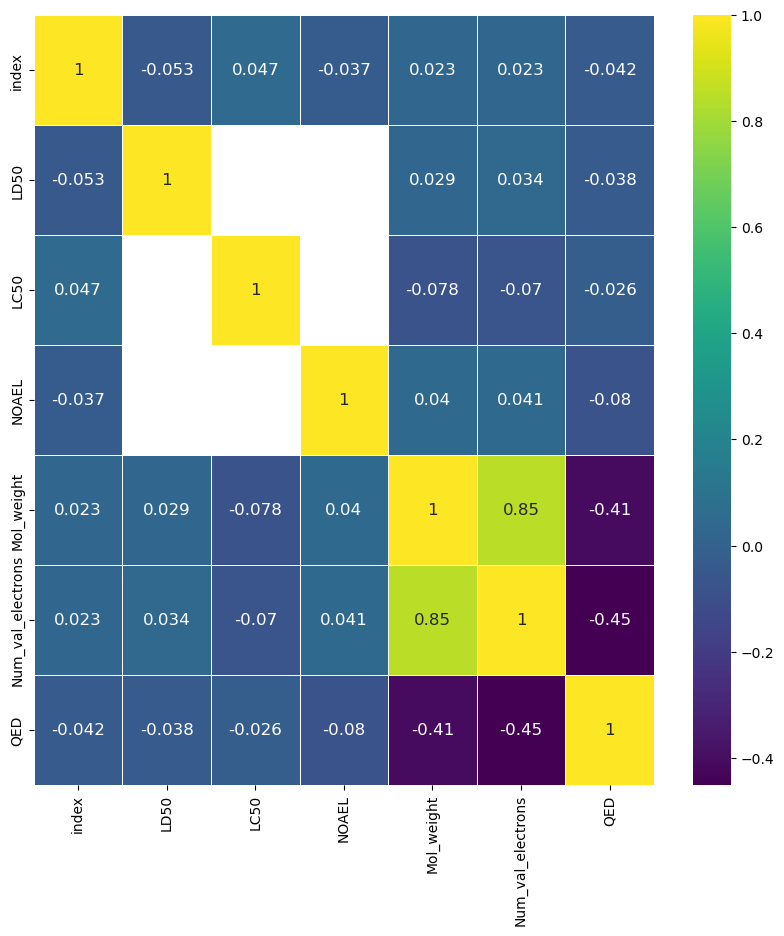

In [51]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df_filtered.corr(),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Можно предположить, что чем выше QED, тем менее токсично само вещество, ведь QED, как было отмечено выше, представляет собой вероятность того, что молекула будет пригодной для разработки в лекарственное средство.

<AxesSubplot:ylabel='QED'>

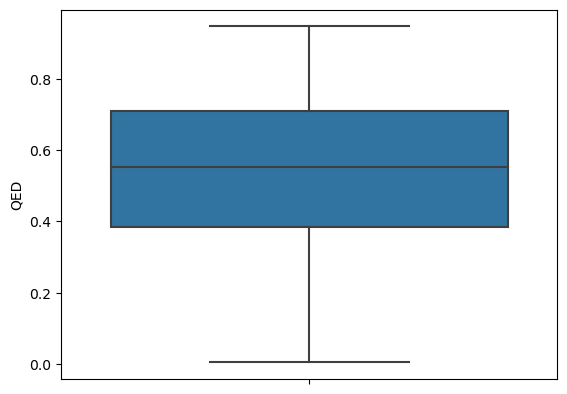

In [52]:
sns.boxplot(y = df_filtered['QED'],  whis=50) 

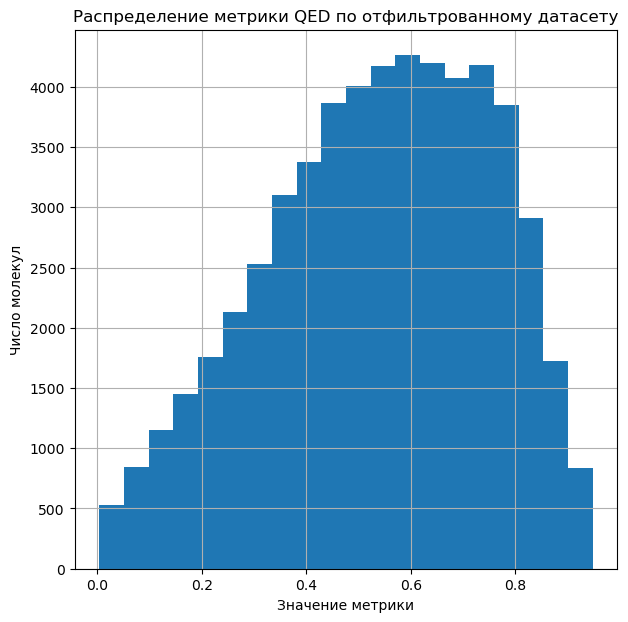

In [53]:
df_filtered['QED'].hist(figsize=(7,7), bins = 20)
plt.title('Распределение метрики QED по отфильтрованному датасету')
plt.xlabel('Значение метрики')
plt.ylabel('Число молекул')
plt.show()
#построили гистограммы для всех числовых столбцов таблицы.

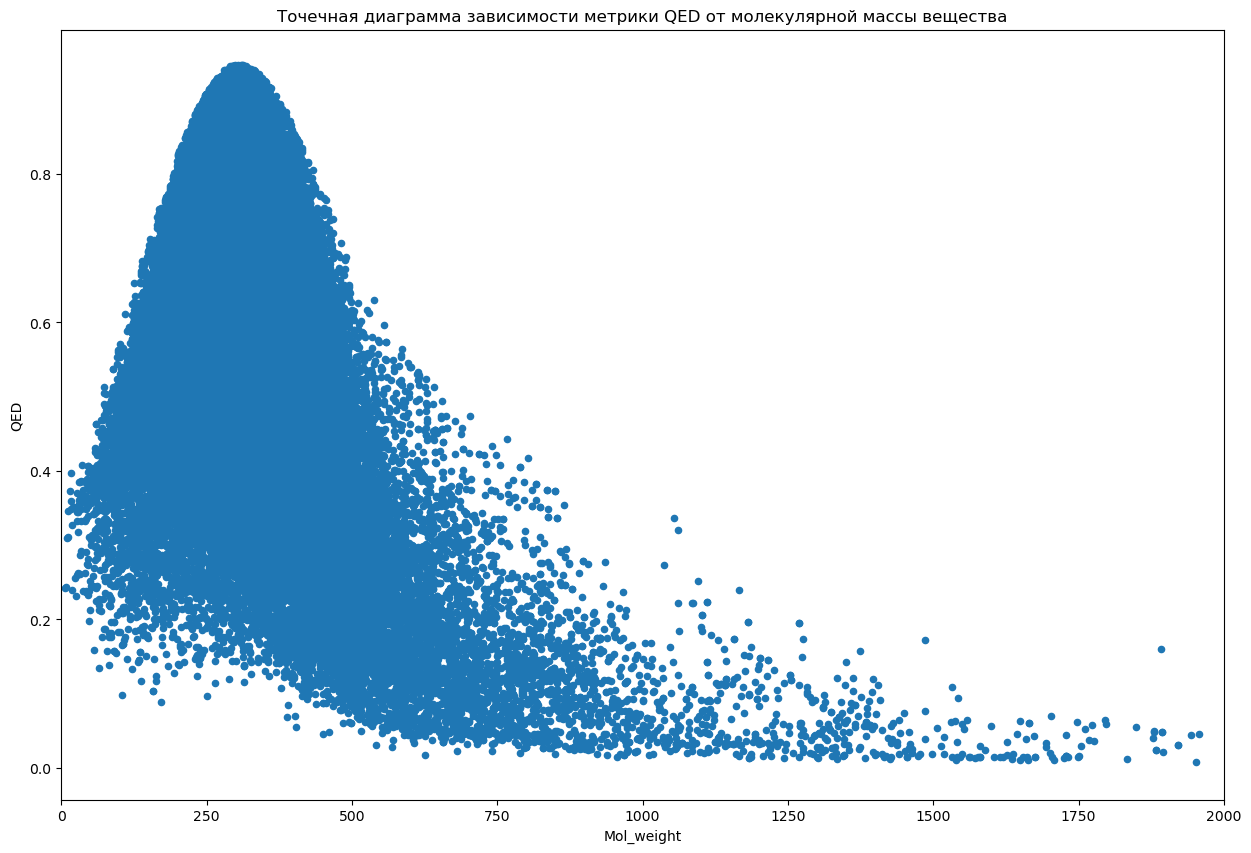

In [54]:
df_filtered.plot.scatter(x='Mol_weight', y='QED', figsize=(15,10), xlim=(0, 2000))
plt.title('Точечная диаграмма зависимости метрики QED от молекулярной массы вещества')
plt.show()